In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config
import dataset.train_dataset as dtd
import PIL
import PIL.ImageOps
test_config = Config()

In [20]:
pretrain_NIH_info = pd.read_csv(test_config.pretrain_NIH_chest_info)
pretrain_NIH_info

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [21]:
pretrain_NIH_info['Finding Labels'] = pretrain_NIH_info['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
pretrain_NIH_info['Finding Labels'] = pretrain_NIH_info['Finding Labels'].map(lambda x: x.split('|'))


In [22]:
all_labels = set(pretrain_NIH_info['Finding Labels'].sum())
all_labels = [x for x in all_labels if len(x)>0]

In [38]:
for c_label in all_labels:
    pretrain_NIH_info[c_label] = pretrain_NIH_info['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
for c_label,g in zip(["Gender_M","Gender_F"],["M","F"]):
    pretrain_NIH_info[c_label] = pretrain_NIH_info['Patient Gender'].map(lambda gen: 1.0 if g in gen else 0)

In [39]:
pretrain_NIH_info

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Effusion,Cardiomegaly,Pneumonia,Pleural_Thickening,Pneumothorax,Edema,Atelectasis,Consolidation,Hernia,Nodule,Fibrosis,Mass,Infiltration,Emphysema,Gender_M,M,Gender_F
0,00000001_000.png,[Cardiomegaly],0,1,58,M,PA,2682,2749,0.143,0.143,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,M,PA,2894,2729,0.143,0.143,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,M,PA,2500,2048,0.168,0.168,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,00000002_000.png,[],0,2,81,M,PA,2500,2048,0.171,0.171,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,00000003_000.png,[Hernia],0,3,81,F,PA,2582,2991,0.143,0.143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,"[Mass, Pneumonia]",1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
112116,00030802_000.png,[],0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
112117,00030803_000.png,[],0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
112118,00030804_000.png,[],0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [40]:
useful_cols=["Image Index","Patient Age","Gender_M","Gender_F"] + all_labels

In [45]:
pretrain_NIH_info = pretrain_NIH_info[useful_cols]

In [46]:
pretrain_NIH_info

,Image Index,Patient Age,Gender_M,Gender_F,Effusion,Cardiomegaly,Pneumonia,Pleural_Thickening,Pneumothorax,Edema,Atelectasis,Consolidation,Hernia,Nodule,Fibrosis,Mass,Infiltration,Emphysema
0,00000001_000.png,58,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,58,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,00000001_002.png,58,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
112116,00030802_000.png,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
import dataset.pretrain_dataset as dpd

In [51]:
# reload the library
import importlib
importlib.reload(dtd)

<module 'dataset.train_dataset' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/dataset/train_dataset.py'>

In [57]:
dataset = dpd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()

WARNING - Missing permissions to create directory for caching!
WARNING - Missing permissions to create directory for caching!


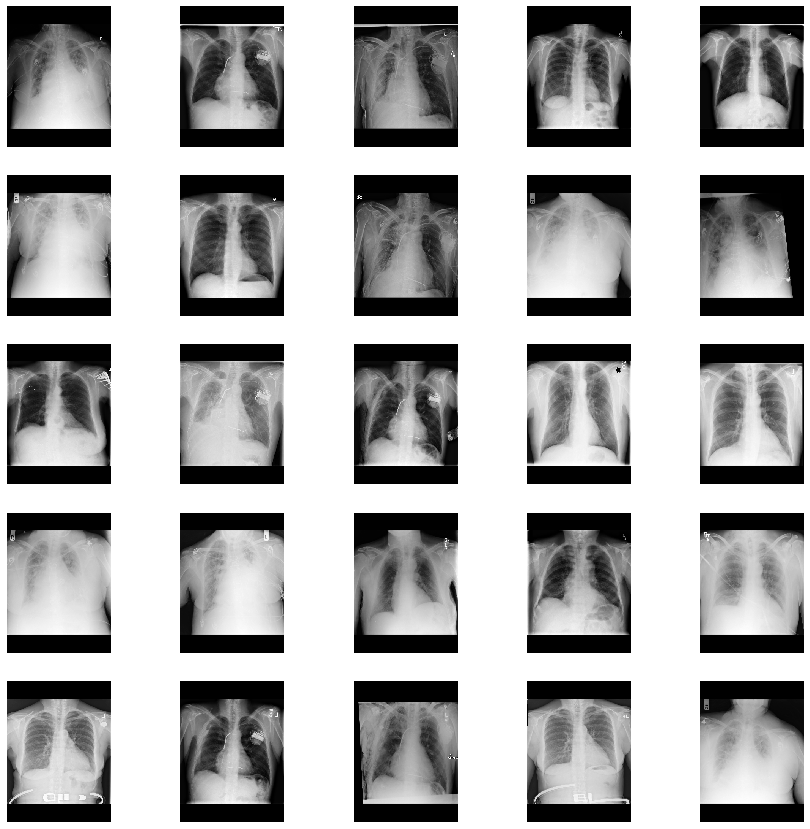

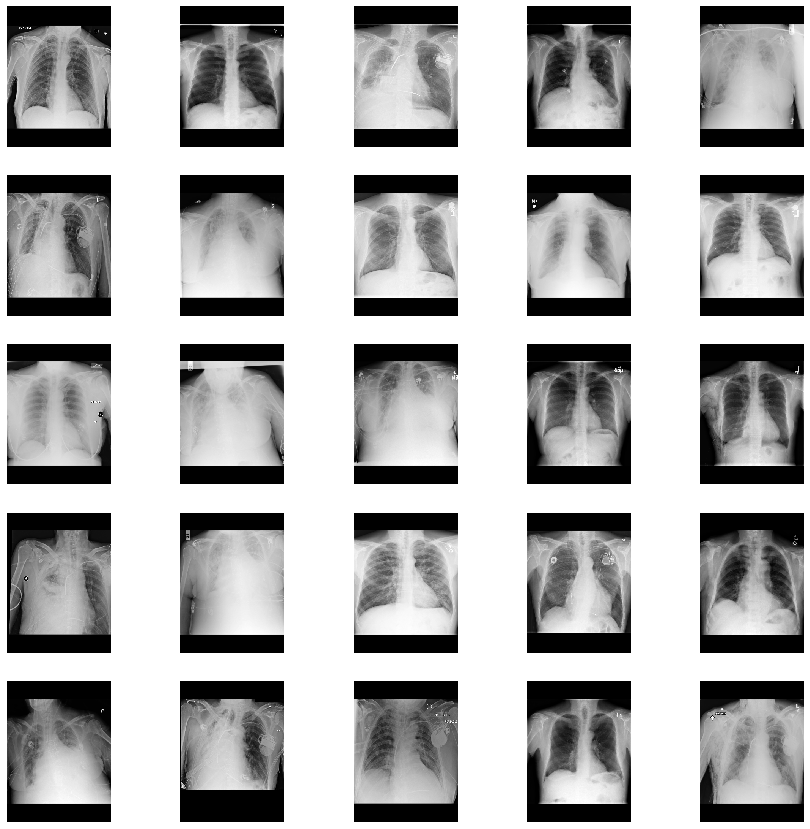

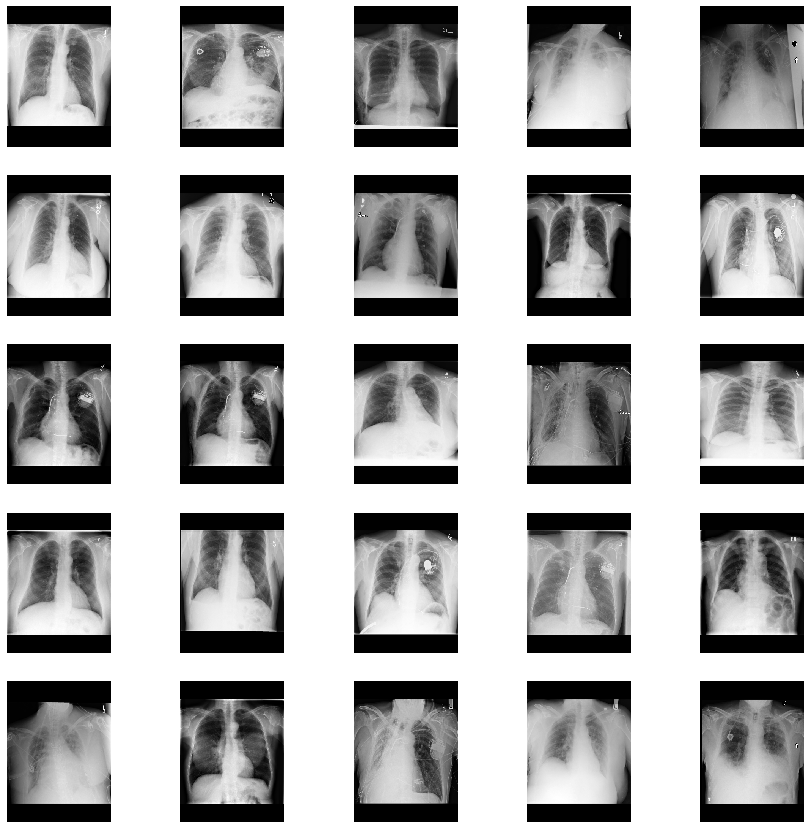

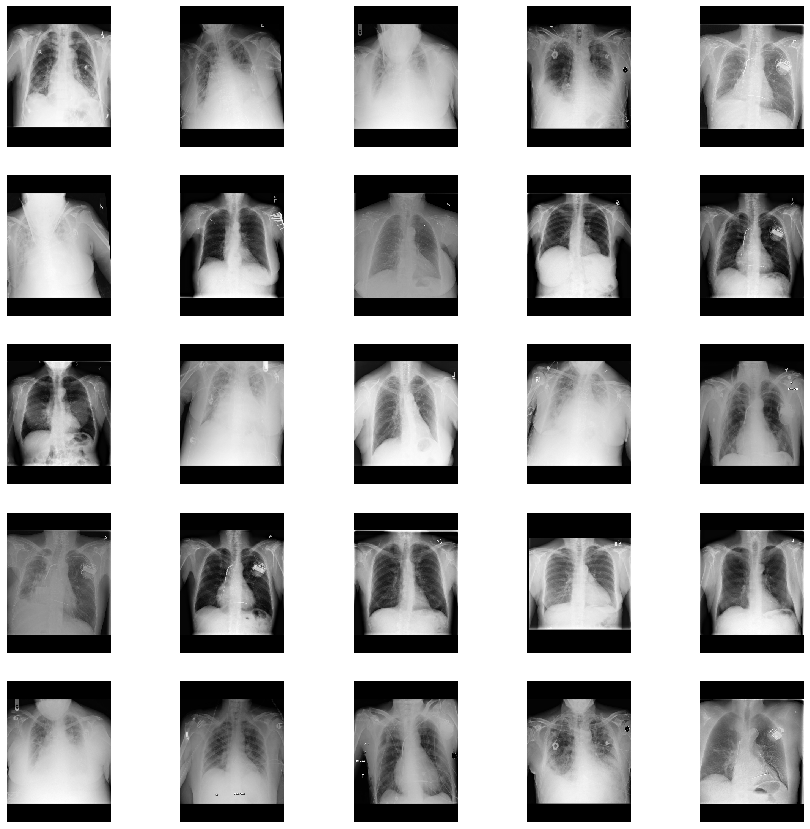

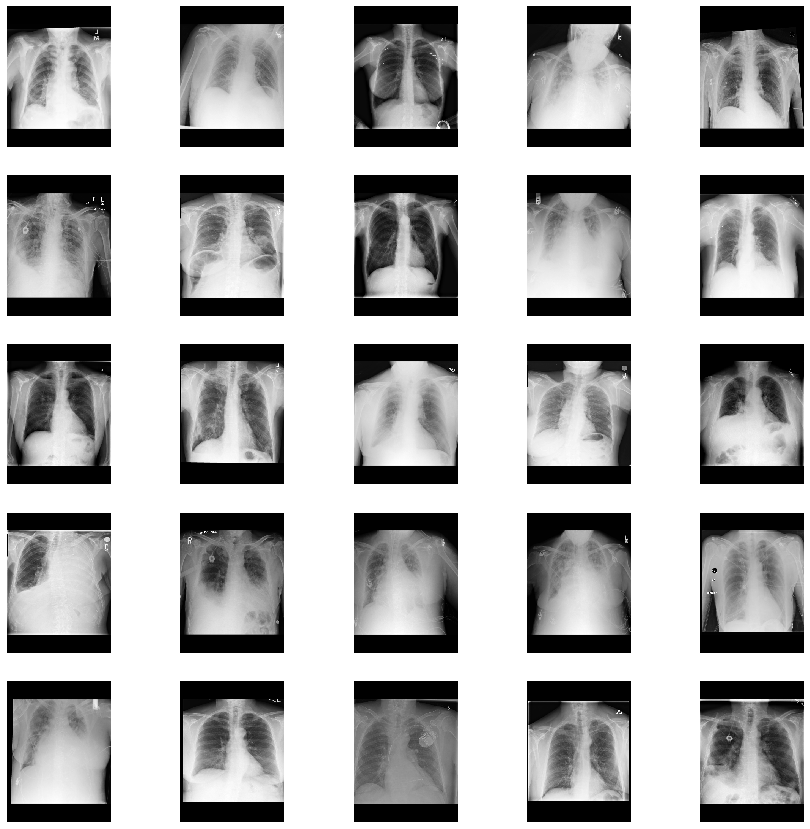

In [58]:
for image, label in chest_dataset_val.take(5):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(image[n])[:, :, 0],cmap="gray")
        plt.axis('off')